# Instacart - trabalho de LP análise de dados

### Objetivo: Prever qual produto (prior order) será pedido novamente(train e test order)

In [2]:
# Importar as bibliotecas e instalar pandas e seaborn

! pip install pandas
! pip install seaborn

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

print('all libraries installed')

all libraries installed


## Importing Data Sets

In [3]:
# importar data sets e utilizar a função .head() para visualizar as primeiras 5 linhas
orders = pd.read_csv('C:\\Users\\user\\opencv\\Scripts\\orders.csv')
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [4]:
order_products__train = pd.read_csv('C:\\Users\\user\\opencv\\Scripts\\order_products__train.csv')
order_products__train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [5]:
order_products__prior = pd.read_csv('C:\\Users\\user\\opencv\\Scripts\\order_products__prior.csv')
order_products__prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [6]:
products = pd.read_csv('C:\\Users\\user\\opencv\\Scripts\\products.csv')
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [7]:
aisles = pd.read_csv('C:\\Users\\user\\opencv\\Scripts\\aisles.csv')
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [8]:
departments = pd.read_csv('C:\\Users\\user\\opencv\\Scripts\\departments.csv')
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [9]:
orders.replace(np.nan, 0, inplace=True)
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,0.0
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


## Explore the data

In [11]:
# agrupar entre pedidos anteriormente(prior) e pedidos futuros(test e train)
kind_orders = orders.groupby('eval_set')['order_id'].aggregate(Total_orders = 'count').reset_index()
kind_orders

,eval_set,Total_orders
0,prior,3214874
1,test,75000
2,train,131209


In [12]:
#colocar os valores em ordem decrescente
kind_orders = kind_orders.groupby(['eval_set']).sum()['Total_orders'].sort_values(ascending=False)
kind_orders

eval_set
prior    3214874
train     131209
test       75000
Name: Total_orders, dtype: int64

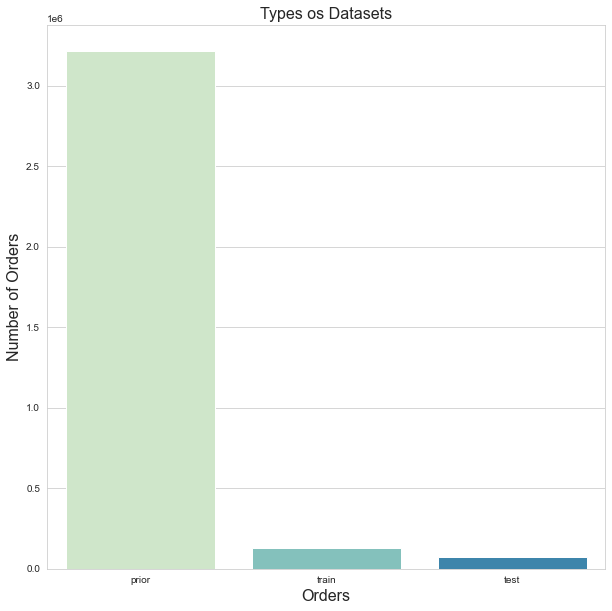

In [13]:
#plotar um bar plot para analisar os tipos de ordens x número de ordens
sns.set_style('whitegrid')

f, ax = plt.subplots(figsize=(10,10))
sns.barplot(kind_orders.index, kind_orders.values, palette='GnBu')
plt.ylabel('Number of Orders', fontsize=16)
plt.xlabel('Orders', fontsize=16)
plt.title('Types os Datasets', fontsize=16)

plt.show()

prior (ordem solicitada anteriormente) , train e test (possíveis próximas ordens)


In [16]:
# Combinar os datasets de departament e aisles
dep_aisle = products.reset_index().set_index('department_id').join(departments, how='inner')
dep_aisle = dep_aisle.reset_index().set_index('aisle_id').join(aisles, how='inner')
dep_aisle.head()

,level_0,index,product_id,product_name,department_id,department,aisle_id,aisle
1,20,208,209,Italian Pasta Salad,21,missing,2,specialty cheeses
1,20,553,554,Turkey Chili,21,missing,2,specialty cheeses
1,20,885,886,Whole Grain Salad with Roasted Pecans & Mango ...,21,missing,2,specialty cheeses
1,20,1599,1600,Mediterranean Orzo Salad,21,missing,2,specialty cheeses
1,20,2538,2539,Original Potato Salad,21,missing,2,specialty cheeses


In [17]:
# Orders por dia da semana
day_of_week = orders.groupby('order_id')['order_dow'].aggregate('sum').reset_index()
day_of_week = day_of_week.order_dow.value_counts()

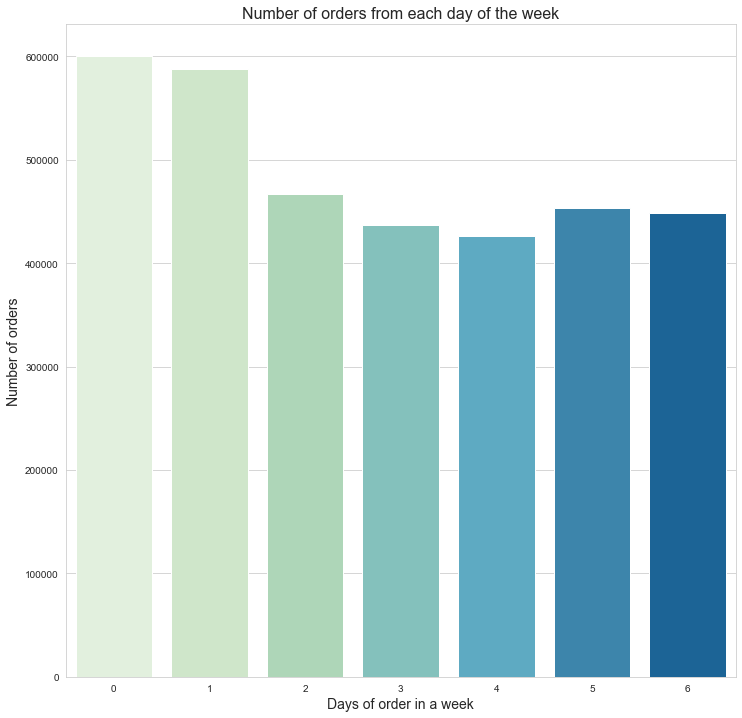

In [19]:
# Plotar um barplot para verificar a frequência de pedidos por dia da semana
f, ax = plt.subplots(figsize=(12, 12))
sns.barplot(day_of_week.index, day_of_week.values, palette='GnBu')
plt.ylabel('Number of orders', fontsize=14)
plt.xlabel('Days of order in a week', fontsize=14)
plt.title('Number of orders from each day of the week', fontsize = 16)

plt.show()

Percebemos que no final de semana (day 0 e day 1) a quantidade de pedidos é maior

In [20]:
# Orders por hora do dia
time_of_day = orders.groupby('order_id')['order_hour_of_day'].aggregate('sum').reset_index()
time_of_day = time_of_day.order_hour_of_day.value_counts()

<function matplotlib.pyplot.show(*args, **kw)>

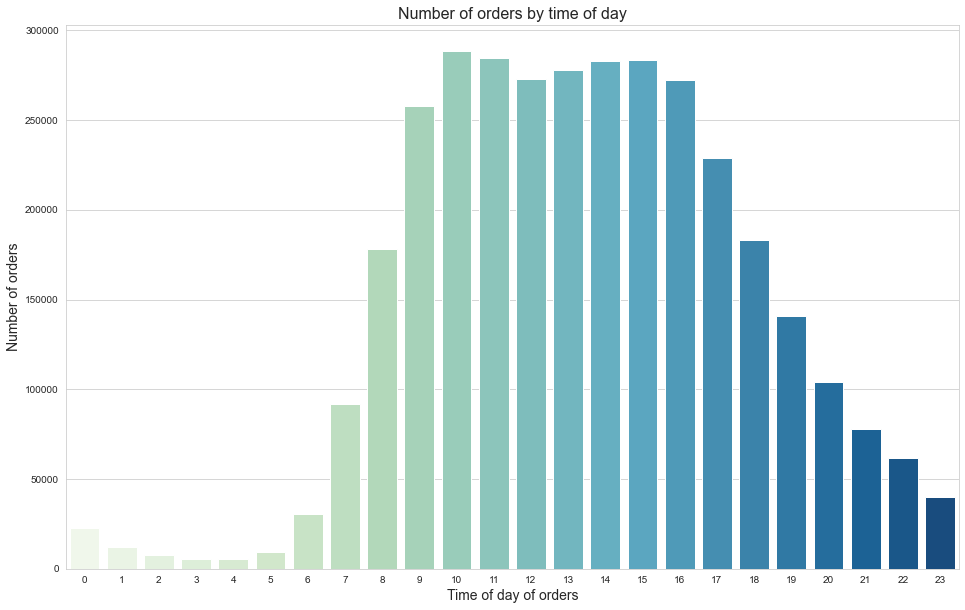

In [31]:
# Plotar usando barplot a frequência de pedidos por hora do dia
f, ax = plt.subplots(figsize=(16,10))
sns.barplot(time_of_day.index, time_of_day.values, palette ='GnBu')
plt.ylabel('Number of orders', fontsize=14)
plt.xlabel('Time of day of orders', fontsize=14)
plt.title('Number of orders by time of day', fontsize=16)

plt.show

Horário de pico é entre 9am to 16(4pm)

## Reorder

In [37]:
# Verificar em percentual o total de productos pedidos novamente
freq_reorder = order_products__prior.groupby('reordered')['product_id'].aggregate(Total_Products = 'count').reset_index()

freq_reorder['Ratios'] = freq_reorder['Total_Products'].apply(lambda x: x / freq_reorder['Total_Products'].sum())

freq_reorder

,reordered,Total_Products,Ratios
0,0,13307953,0.410303
1,1,19126536,0.589697


Temos que 58,96% dos clientes pedem novamente um produto que já haviam pedido

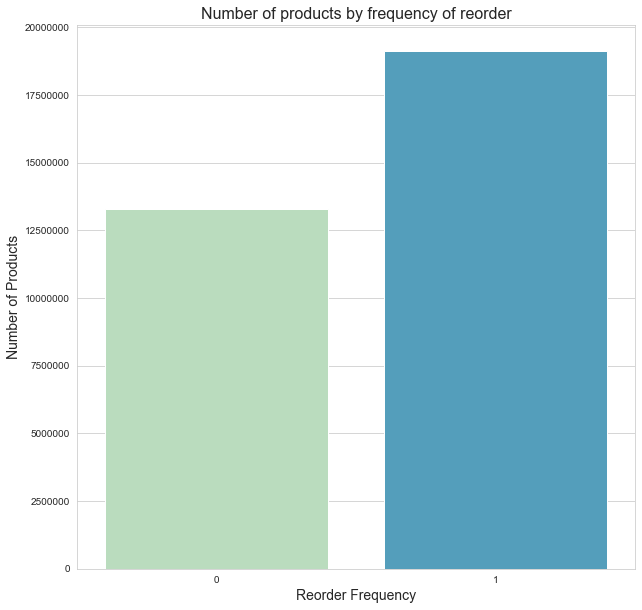

In [38]:
# Plotar um barplot para analisar a quantidade de produtos pedidos novamente sim ou não(1 e 0)

freq_reorder = freq_reorder.groupby(['reordered']).sum()['Total_Products'].sort_values(ascending=False)

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(freq_reorder.index, freq_reorder.values, palette ='GnBu')
plt.ylabel('Number of Products', fontsize=14)
plt.xlabel('Reorder Frequency', fontsize=14)
plt.title('Number of products by frequency of reorder', fontsize=16)
plt.ticklabel_format(style='plain', axis='y')

plt.show()

## Top reordered products

In [50]:
# concatenar os arquivos: order_products__train e order_products__prior
order_products_total = pd.concat([order_products__train, order_products__prior], axis=0)
order_products_total.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [49]:
# Agregar as colunas: product_id, reorder_sum e reorder_total.
top_reordered = order_products_total.groupby('product_id')['reordered'].aggregate(Reorder_sum = sum, Reorder_Total = 'count').reset_index()

# inserir uma coluna com a probabilidade de solicitar novamente um produto
top_reordered['Probability_of_Reorder'] = top_reordered['Reorder_sum'] / top_reordered['Reorder_Total']

top_reordered.head()

,product_id,Reorder_sum,Reorder_Total,Probability_of_Reorder
0,1,1185,1928,0.614627
1,2,13,94,0.138298
2,3,209,283,0.738516
3,4,161,351,0.458689
4,5,10,16,0.625000


In [48]:
# Associar nome de produto com seus códigos de produto
top_reordered = pd.merge(top_reordered, products[['product_id', 'product_name']])

# Colocar em ordem de probabilidade de pedir novamente
top_reordered = top_reordered.sort_values(['Probability_of_Reorder'], ascending=False)

top_reordered.head()

,product_id,Reorder_sum,Reorder_Total,Probability_of_Reorder,product_name
0,6433,65,69,0.942029,Raw Veggie Wrappers
1,2075,84,90,0.933333,Serenity Ultimate Extrema Overnight Pads
2,43553,12,13,0.923077,Orange Energy Shots
3,27740,94,102,0.921569,Chocolate Love Bar
4,14609,32,35,0.914286,Soy Powder Infant Formula
